# [Capstone Project] ML for Healthcare
# Ramisha Mahiyat
# MODEL-KNN




In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier


# Load the pickle files
train_data = pd.read_pickle('ECG5000_train.pickle')
val_data = pd.read_pickle('ECG5000_validation.pickle')
#train_data = pd.read_csv('ECG5000_TRAIN.txt', sep='\s+', header=None)
#val_data = pd.read_csv('ECG5000_TEST.txt', sep='\s+', header=None)

# Store in dictionary
ECGdataset = {
    'train': train_data,
    'validation': val_data
}
print("First sample:\n", ECGdataset['train'][0])
print("First feature of the 10th sample:", ECGdataset['train'][9][1])

First sample:
 [ 0.         -0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041
 -3.4749863  -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791
 -0.49195659 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627
 -0.36791303 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703
 -0.44929829 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519
 -0.6942     -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688
 -0.67228161 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332
 -0.46305183 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574
 -0.06560876  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371
  0.22522849  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297
  0.24472863  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823
  0.48151204  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919
  0.607979    0.62063457  0.65625291  0.68474806  0.69427284  0.66558377
  0.57579577  0.63813479  0.61491695  0.

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Extract features and labels
X_train = ECGdataset['train'][:, 1:]
y_train = ECGdataset['train'][:, 0]
X_val = ECGdataset['validation'][:, 1:]
y_val = ECGdataset['validation'][:, 0]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Update ECGdataset with scaled features
ECGdataset['train'][:, 1:] = X_train_scaled
ECGdataset['validation'][:, 1:] = X_val_scaled

print("First sample after preprocessing:")
print(ECGdataset['train'][0][:10])

First sample after preprocessing:
[ 0.          0.04088813 -0.90129978 -0.95168624 -0.94502776 -1.06376367
 -0.63707941  0.15037238 -0.03151738  0.30510472]


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Extract features and labels
X_train = ECGdataset['train'][:, 1:]
y_train = ECGdataset['train'][:, 0]
X_val = ECGdataset['validation'][:, 1:]
y_val = ECGdataset['validation'][:, 0]

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
print("KNN classifier (k=5) has been trained successfully.")

# Predict and evaluate
y_pred = knn_classifier.predict(X_val)
y_prob = knn_classifier.predict_proba(X_val)

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred, average='weighted'),
    'Recall': recall_score(y_val, y_pred, average='weighted'),
    'F1 Score': f1_score(y_val, y_pred, average='weighted'),
    'AUROC': roc_auc_score(y_val, y_prob, multi_class='ovr', average='weighted')
}

# Store confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)

# Print results
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nConfusion Matrix:")
print(cf_matrix)

# Save model performance
model_performance_knn = list(metrics.values())


KNN classifier (k=5) has been trained successfully.
Accuracy: 0.9220
Precision: 0.9066
Recall: 0.9220
F1 Score: 0.9105
AUROC: 0.9611

Confusion Matrix:
[[779   0   0   2   0]
 [ 17 560   4   9   0]
 [  8  17  14   4   0]
 [  5  36   3  30   1]
 [  5   6   0   0   0]]


Text(50.722222222222214, 0.5, 'True Labels')

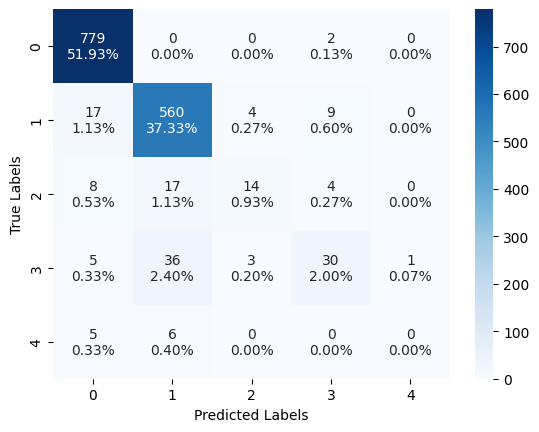

In [6]:
import seaborn as sns

plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')